In [4]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt

In [5]:
cd #Change the directory where the files are stored on your local computer

[Errno 2] No such file or directory: '#Change the directory where the files are stored on your local computer'
/Users/jonmei/Downloads


In [6]:
trainfile=pd.read_csv('bradley_nback_4.csv',skiprows=1) #Delete the first row to make things easier formatting wise
trainfile

,Timestamp,EEG.Counter,EEG.Interpolated,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,POW.F8.Theta,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma
0,1606347239,43,0,4201.410156,4151.794922,4207.436035,4168.974121,4190.897461,4182.179688,4203.974121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1606347239,44,0,4201.410156,4136.794922,4210.769043,4151.025879,4184.615234,4178.589844,4206.538574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1606347239,45,0,4196.666504,4139.615234,4206.282227,4146.153809,4184.102539,4180.641113,4204.871582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1606347239,46,0,4207.563965,4152.436035,4205.897461,4163.589844,4184.743652,4181.025879,4206.794922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1606347239,47,0,4205.641113,4152.436035,4220.000000,4180.641113,4190.256348,4178.974121,4204.743652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,1606347315,6,0,4185.769043,4169.743652,4184.487305,4180.000000,4182.051270,4195.384766,4203.974121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9692,1606347315,7,0,4190.769043,4176.666504,4192.948730,4174.743652,4187.563965,4190.000000,4195.256348,...,5.319114,4.024973,1.584221,0.710581,0.371129,2.857043,2.024399,1.46799,0.529725,0.204092
9693,1606347315,8,0,4199.358887,4175.512695,4214.743652,4176.282227,4184.358887,4180.128418,4186.282227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9694,1606347315,9,0,4199.487305,4172.563965,4209.230957,4189.230957,4179.230957,4175.897461,4188.846191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Note: This gives the mean of all power bands even though we probably only need to use alpha, theta, low beta
meanArray=[0]*70 #70 power band columns
print(len(meanArray))
print(np.shape(trainfile))
for cols in range(82, 151):
    eegData = trainfile.iloc[:,cols].values
    eegData=eegData[~np.isnan(eegData)] #Ignore cells with NaN values
    meanArray.append(statistics.mean(eegData))#create new array to store means of each column--note array has extra zeros to be removed a few lines down
    if cols==150: 
        eegData = trainfile.iloc[:,-1].values
        eegData=eegData[~np.isnan(eegData)]
        meanArray.append(statistics.mean(eegData))
def remove(list, val):
   return [value for value in list if value != val]

meanArray = remove(meanArray, 0)# remove zeros

#print(len(meanArray))
meanFrame = pd.DataFrame(meanArray, index = ['POW.AF3.Theta','POW.AF3.Alpha','POW.AF3.BetaL','POW.AF3.BetaH','POW.AF3.Gamma','POW.F7.Theta','POW.F7.Alpha','POW.F7.BetaL','POW.F7.BetaH','POW.F7.Gamma','POW.F3.Theta','POW.F3.Alpha','POW.F3.BetaL','POW.F3.BetaH','POW.F3.Gamma','POW.FC5.Theta','POW.FC5.Alpha','POW.FC5.BetaL','POW.FC5.BetaH','POW.FC5.Gamma','POW.T7.Theta','POW.T7.Alpha','POW.T7.BetaL','POW.T7.BetaH','POW.T7.Gamma','POW.P7.Theta','POW.P7.Alpha','POW.P7.BetaL','POW.P7.BetaH','POW.P7.Gamma','POW.O1.Theta','POW.O1.Alpha','POW.O1.BetaL','POW.O1.BetaH','POW.O1.Gamma','POW.O2.Theta','POW.O2.Alpha','POW.O2.BetaL','POW.O2.BetaH','POW.O2.Gamma','POW.P8.Theta','POW.P8.Alpha','POW.P8.BetaL','POW.P8.BetaH','POW.P8.Gamma','POW.T8.Theta','POW.T8.Alpha','POW.T8.BetaL','POW.T8.BetaH','POW.T8.Gamma','POW.FC6.Theta','POW.FC6.Alpha','POW.FC6.BetaL','POW.FC6.BetaH','POW.FC6.Gamma','POW.F4.Theta','POW.F4.Alpha','POW.F4.BetaL','POW.F4.BetaH','POW.F4.Gamma','POW.F8.Theta','POW.F8.Alpha','POW.F8.BetaL','POW.F8.BetaH','POW.F8.Gamma','POW.AF4.Theta','POW.AF4.Alpha','POW.AF4.BetaL','POW.AF4.BetaH','POW.AF4.Gamma'], columns = ['pow means'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(meanFrame)

70
(9696, 151)
               pow means
POW.AF3.Theta   0.502816
POW.AF3.Alpha   0.455791
POW.AF3.BetaL   0.288532
POW.AF3.BetaH   0.360582
POW.AF3.Gamma   1.635086
POW.F7.Theta    0.794702
POW.F7.Alpha    0.763935
POW.F7.BetaL    0.499840
POW.F7.BetaH    0.461580
POW.F7.Gamma    1.487947
POW.F3.Theta    0.635836
POW.F3.Alpha    0.611053
POW.F3.BetaL    0.394790
POW.F3.BetaH    0.316845
POW.F3.Gamma    0.912504
POW.FC5.Theta   0.542730
POW.FC5.Alpha   0.658173
POW.FC5.BetaL   0.766420
POW.FC5.BetaH   0.784623
POW.FC5.Gamma   0.638709
POW.T7.Theta    0.360319
POW.T7.Alpha    0.255642
POW.T7.BetaL    0.157632
POW.T7.BetaH    0.143343
POW.T7.Gamma    0.723012
POW.P7.Theta    0.396567
POW.P7.Alpha    0.323607
POW.P7.BetaL    0.186532
POW.P7.BetaH    0.174827
POW.P7.Gamma    0.474977
POW.O1.Theta    0.336621
POW.O1.Alpha    0.295215
POW.O1.BetaL    0.154494
POW.O1.BetaH    0.117354
POW.O1.Gamma    1.327620
POW.O2.Theta    1.175822
POW.O2.Alpha    1.081129
POW.O2.BetaL    0.489868
POW.O2.Bet

<AxesSubplot:title={'center':'Theta'}>

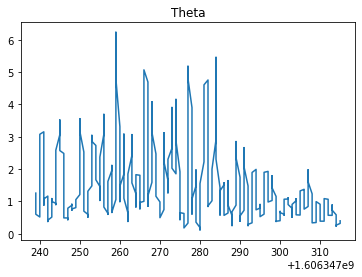

In [18]:
time = [];
Theta = trainfile.iloc[:,81].values
Theta = Theta[~np.isnan(Theta)]
for x in range (12,9695,16):
    time.append(trainfile.iloc[x,0])
ser = pd.Series(data = Theta, index = time)
ser.plot(kind='line', title = 'Theta')

<AxesSubplot:title={'center':'Alpha'}>

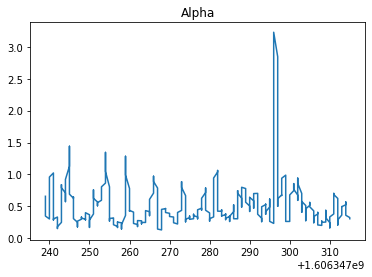

In [16]:
Alpha = trainfile.iloc[:,82].values
Alpha = Alpha[~np.isnan(Alpha)]
ser = pd.Series(data = Alpha, index = time)
ser.plot(kind='line', title = 'Alpha')


<AxesSubplot:title={'center':'BetaL'}>

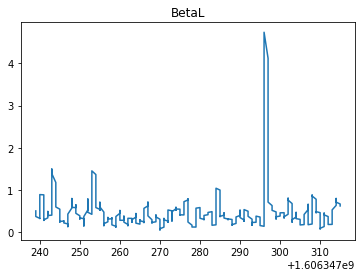

In [19]:
BetaL = trainfile.iloc[:,83].values
BetaL = BetaL[~np.isnan(BetaL)]
ser = pd.Series(data = BetaL, index = time)
ser.plot(kind='line', title = 'BetaL')


<AxesSubplot:title={'center':'BetaH'}>

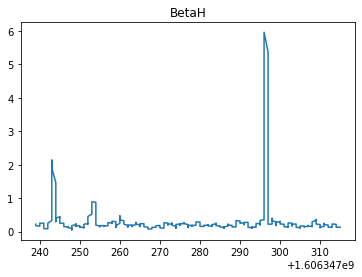

In [20]:
BetaH = trainfile.iloc[:,84].values
BetaH = BetaH[~np.isnan(BetaH)]
ser = pd.Series(data = BetaH, index = time)
ser.plot(kind='line', title = 'BetaH')


<AxesSubplot:title={'center':'Gamma'}>

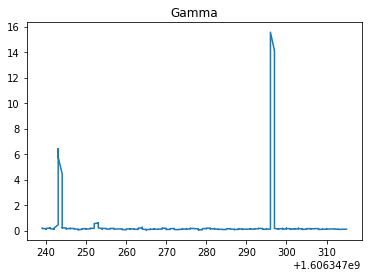

In [21]:
Gamma = trainfile.iloc[:,85].values
Gamma = Gamma[~np.isnan(Gamma)]
ser = pd.Series(data = Gamma, index = time)
ser.plot(kind='line', title = 'Gamma')
